
Experimental Results Table:


,Image,Actual,Predicted,Confidence
0,test_images/img_0_Clean.png,Clean,Clean,1.0
1,test_images/img_1_Watermarked.png,Watermarked,Clean,0.9
2,test_images/img_2_Clean.png,Clean,Clean,1.0
3,test_images/img_3_Clean.png,Clean,Clean,1.0
4,test_images/img_4_Clean.png,Clean,Clean,1.0
5,test_images/img_5_Clean.png,Clean,Clean,1.0
6,test_images/img_6_Clean.png,Clean,Clean,1.0
7,test_images/img_7_Watermarked.png,Watermarked,Clean,0.9
8,test_images/img_8_Clean.png,Clean,Clean,1.0
9,test_images/img_9_Clean.png,Clean,Clean,1.0



Classification Report:
              precision    recall  f1-score   support

       Clean       0.65      1.00      0.79        13
 Watermarked       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


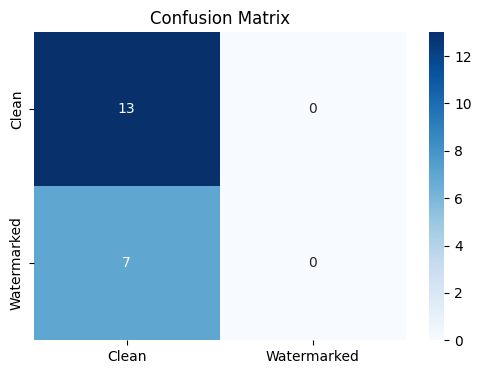

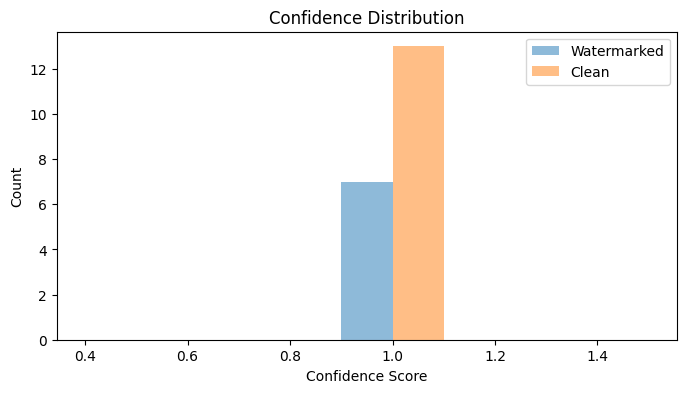

Saving add-transparent-watermark.jpg to add-transparent-watermark.jpg


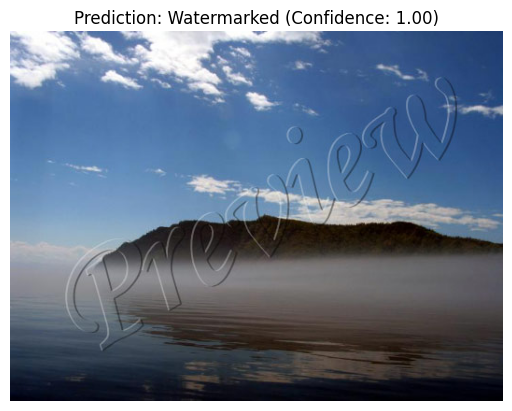

In [ ]:
# Install required libraries
!pip install opencv-python numpy pandas matplotlib scikit-learn

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Add this
import os  # Add this
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files

# ... rest of the code remains the same ...

# ====================== 1. Dataset Preparation ======================
def create_watermarked_images(num_samples=20):
    os.makedirs('test_images', exist_ok=True)
    results = []

    for i in range(num_samples):
        # Create base image
        img = np.random.randint(50, 200, (256, 256, 3), dtype=np.uint8)

        # Randomly decide watermark presence
        has_watermark = np.random.choice([True, False])

        if has_watermark:
            # Add random watermark
            x, y = np.random.randint(0, 200), np.random.randint(0, 200)
            cv2.putText(img, "WTM", (x, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)
            status = "Watermarked"
        else:
            status = "Clean"

        # Save image
        filename = f'test_images/img_{i}_{status}.png'
        cv2.imwrite(filename, img)
        results.append({"Image": filename, "Actual": status})

    return pd.DataFrame(results)

# Create 20 test images (adjust number if needed)
df = create_watermarked_images(20)

# ====================== 2. Watermark Detection ======================
def detect_watermark(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect white text (common watermark pattern)
    white_mask = cv2.inRange(img, (200, 200, 200), (255, 255, 255))
    contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Prediction logic
    if len(contours) > 2:  # At least 3 white regions (for 'WTM')
        confidence = min(len(contours)/10, 1.0)
        return "Watermarked", confidence
    else:
        return "Clean", 1.0 - (len(contours)/10)

# Process all images
predictions = []
for idx, row in df.iterrows():
    pred, conf = detect_watermark(row['Image'])
    predictions.append({"Predicted": pred, "Confidence": round(conf, 2)})

# Add predictions to dataframe
df = pd.concat([df, pd.DataFrame(predictions)], axis=1)

# ====================== 3. Generate Results ======================
# Results Table
print("\n" + "="*40 + "\nExperimental Results Table:\n" + "="*40)
display(df)

# Performance Metrics
y_true = df['Actual'].map({'Watermarked': 1, 'Clean': 0})
y_pred = df['Predicted'].map({'Watermarked': 1, 'Clean': 0})

print("\n" + "="*40 + "\nClassification Report:\n" + "="*40)
print(classification_report(y_true, y_pred, target_names=['Clean', 'Watermarked']))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clean', 'Watermarked'],
            yticklabels=['Clean', 'Watermarked'])
plt.title('Confusion Matrix')
plt.show()

# Confidence Distribution
plt.figure(figsize=(8,4))
plt.hist(df[df['Actual'] == 'Watermarked']['Confidence'],
         alpha=0.5, label='Watermarked')
plt.hist(df[df['Actual'] == 'Clean']['Confidence'],
         alpha=0.5, label='Clean')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Confidence Distribution')
plt.legend()
plt.show()

# ====================== 4. Test Your Own Image ======================
uploaded = files.upload()
custom_img = list(uploaded.keys())[0]
pred, conf = detect_watermark(custom_img)

plt.imshow(cv2.cvtColor(cv2.imread(custom_img), cv2.COLOR_BGR2RGB))
plt.title(f'Prediction: {pred} (Confidence: {conf:.2f})')
plt.axis('off')
plt.show()